# TAL aplicado al análisis del discurso de los medios de prensa 📰🤓🔥

El dataset se clasificará en función de las siguientes etiquetas:
- mundo = 0 
- economía = 1 
- política y conflictos = 2 
- ciencia y tecnología = 3
- catástrofes y accidentes = 4 
- cultura y arte = 5 
- deporte = 6 
- ecología y planeta = 7
- crimen, delitos y justicia = 8 
- salud = 9

### Cronograma

- Hito Unidad 2 (27 de octubre): Implementación y experimentos de varios modelos de clasificación

- Hito Proyecto (15 de diciembre): Evaluación y comparación de los modelos de los distintos equipos + integración de los mejores modelos en la arquitectura Sophia2.


In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data manipulation
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataEtiquetada.csv")
df['label'].value_counts()

economía                      2060
ciencia y tecnología          2060
política y conflictos         2060
crimen, delitos y justicia    2060
deporte                       2060
mundo                         2060
ecología y planeta            2060
catástrofes y accidentes      2060
cultura y arte                2020
salud                         1928
Name: label, dtype: int64

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.5)

#### Preprocesamiento y representación vectorial

In [32]:
import spacy
spacy.prefer_gpu()
nlp = spacy.load("es_core_news_sm")
print(spacy.__version__)
import string
from spacy.lang.es.stop_words import STOP_WORDS
from spacy.lang.es import Spanish
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression # Regresion Logística

# Create our list of punctuation marks
punctuations = [".",",","!","?", "#","&","(","-",">","<",")","'","¡","...","¿", "/" ,'"', '”', '“']

# Create our list of stopwords
stop_words= spacy.lang.es.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = Spanish()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [word.lower_ for word in mytokens]
        
    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations]

    # return preprocessed list of tokens
    return mytokens
  

3.2.0


In [33]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
bow_vector

CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7f55c1851a60>)

In [34]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

#### entrenamiento del modelo de clasificación

In [35]:
# Logistic Regression Classifier
modelLR = LogisticRegression()

# Create pipeline using Bag of Words
model1 = Pipeline([('preprocessing', bow_vector),
                ('regression-ML', modelLR)])
# model generation
model1.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7f55c1851a60>)),
                ('regression-ML', LogisticRegression())])

In [36]:
# Logistic Regression Classifier
modelLR = LogisticRegression()

model2 = Pipeline([('preprocessing', tfidf_vector),
                 ('regression-ML', modelLR)])

# model generation
model2.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7f55c1851a60>)),
                ('regression-ML', LogisticRegression())])

#### Evaluación del modelo de clasificación

In [37]:
# Predicting with a test dataset
predicted1 = model1.predict(X_test)
print(predicted1)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted1))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted1, average='micro'))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted1, average='micro'))

['crimen, delitos y justicia' 'salud' 'deporte' ... 'deporte'
 'cultura y arte' 'ciencia y tecnología']
Logistic Regression Accuracy: 0.9278441355002938
Logistic Regression Precision: 0.9278441355002938
Logistic Regression Recall: 0.9278441355002938


In [38]:
# Predicting with a test dataset
predicted2 = model2.predict(X_test)
print(predicted2)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted2))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted2, average='micro'))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted2, average='micro'))

['crimen, delitos y justicia' 'salud' 'deporte' ... 'deporte'
 'cultura y arte' 'ciencia y tecnología']
Logistic Regression Accuracy: 0.9009203054630899
Logistic Regression Precision: 0.9009203054630899
Logistic Regression Recall: 0.9009203054630899


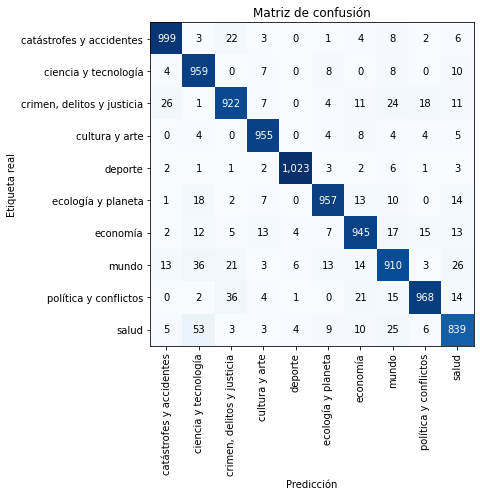

                            precision    recall  f1-score   support

  catástrofes y accidentes      0.950     0.953     0.951      1048
      ciencia y tecnología      0.881     0.963     0.920       996
crimen, delitos y justicia      0.911     0.900     0.906      1024
            cultura y arte      0.951     0.971     0.961       984
                   deporte      0.986     0.980     0.983      1044
        ecología y planeta      0.951     0.936     0.944      1022
                  economía      0.919     0.915     0.917      1033
                     mundo      0.886     0.871     0.878      1045
     política y conflictos      0.952     0.912     0.932      1061
                     salud      0.892     0.877     0.884       957

                  accuracy                          0.928     10214
                 macro avg      0.928     0.928     0.928     10214
              weighted avg      0.928     0.928     0.928     10214



In [39]:
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(cm, labels, cmap=plt.cm.Blues):
    fig, ax = plt.subplots(figsize=(7, 7), tight_layout=True)
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    for i in range(cm.shape[1]):
        for j in range(cm.shape[0]):
            ax.text(j, i, "{:,}".format(cm[i, j]), 
                    horizontalalignment="center", verticalalignment="center",
                    color="white" if cm[i, j] > np.amax(cm)/2 else "black")
    ax.set_title("Matriz de confusión")
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation='vertical')
    plt.yticks(tick_marks, labels)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Predicción')
    plt.show()

cm = confusion_matrix(y_true=y_test, y_pred=predicted1)
plot_confusion_matrix(cm, labels=list(df['label'].unique()))
print(classification_report(y_test, predicted1, digits=3))

In [40]:
def printNMostInformative(vectorizer, model, N):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(model.coef_[0], feature_names))
    topClass1 = coefs_with_fns[:N]
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Class 1 best: ")
    for feat in topClass1:
        print(feat)
    print("Class 2 best: ")
    for feat in topClass2:
        print(feat)

In [41]:
printNMostInformative(bow_vector, modelLR, 20)

Class 1 best: 
(-2.470446490013856, 'y')
(-0.9224606712779984, 'casos')
(-0.899920180775196, 'mundo')
(-0.8790459752486831, 'eclipse')
(-0.8627131558724607, 'salud')
(-0.8065530193428556, 'ataque')
(-0.7986498186026285, 'covid-19')
(-0.7617137303804198, 'vacuna')
(-0.7341638992590022, 'animales')
(-0.7275241818717901, 'coronavirus')
(-0.722424370637068, 'países')
(-0.7170305290134311, 'partido')
(-0.7130990334846915, 'unidos')
(-0.7074444410883198, 'trabajadores')
(-0.6913939914039012, 'grupo')
(-0.6830131740585045, 'país')
(-0.658119919634787, 'a')
(-0.650575612916115, 'agua')
(-0.6334274451292917, 'virus')
(-0.6256327101352808, 'tierra')
Class 2 best: 
(7.889131569527885, 'incendio')
(5.637885398751756, 'accidente')
(4.813336924077538, 'bomberos')
(3.7063929330463017, 'tránsito')
(3.014906047806828, 'catástrofe')
(2.8824685759713735, 'siniestro')
(2.8512932667638218, 'incendios')
(2.8413710406233963, 'sismo')
(2.3267526384839927, 'magnitud')
(2.2910579466389147, 'accidentes')
(2.2538